In [1]:
#import the files required
from google.colab import files
import io
uploaded =files.upload()
for fn in uploaded.keys():
   print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving Iris.csv to Iris.csv
User uploaded file "Iris.csv" with length 5107 bytes


In [2]:
#Load the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#read the data from the file
ir = pd.read_csv('Iris.csv')

#Viewing the data
ir.sample(5) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
11,12,4.8,3.4,1.6,0.2,Iris-setosa
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
33,34,5.5,4.2,1.4,0.2,Iris-setosa
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
125,126,7.2,3.2,6.0,1.8,Iris-virginica


In [4]:
#data type of values
ir.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
#checking weather it cantains any missing values
ir.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
#Levels of the prediction column
ir['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
#counts the species values
ir["Species"].value_counts() 

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [8]:
#removing the unwanted columns

ir = ir.drop(['Id'], axis = 1)

In [9]:
#understanding the central tendency of data
ir.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
#Summary of the data based on species
ir.groupby('Species').agg(['mean', 'median'])

SepalLengthCm        SepalWidthCm  ... PetalLengthCm PetalWidthCm       
                         mean median         mean  ...        median         mean median
Species                                            ...                                  
Iris-setosa             5.006    5.0        3.418  ...          1.50        0.244    0.2
Iris-versicolor         5.936    5.9        2.770  ...          4.35        1.326    1.3
Iris-virginica          6.588    6.5        2.974  ...          5.55        2.026    2.0

[3 rows x 8 columns]

#Histogram for Iris dataset

Text(0, 0.5, 'Count')

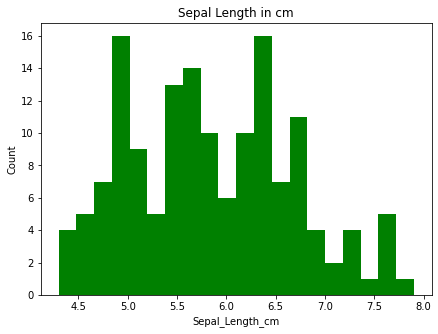

In [11]:
plt.figure(figsize = (7, 5)) 
x = ir["SepalLengthCm"] 
  
plt.hist(x, bins = 20, color = "green") 
plt.title("Sepal Length in cm") 
plt.xlabel("Sepal_Length_cm") 
plt.ylabel("Count") 

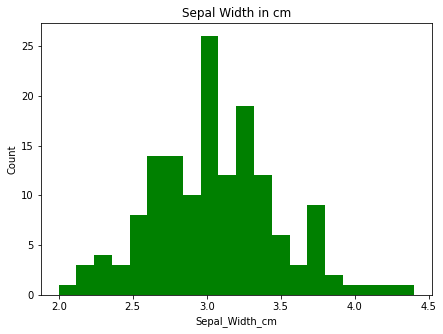

In [12]:
plt.figure(figsize = (7, 5)) 
x = ir.SepalWidthCm 
  
plt.hist(x, bins = 20, color = "green") 
plt.title("Sepal Width in cm") 
plt.xlabel("Sepal_Width_cm") 
plt.ylabel("Count") 
  
plt.show() 

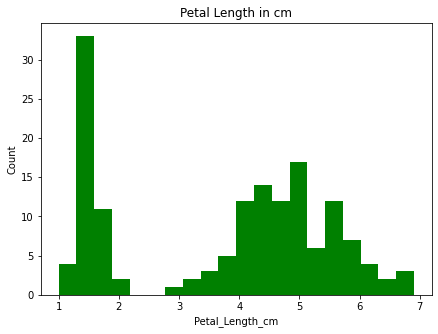

In [13]:
plt.figure(figsize = (7, 5)) 
x = ir.PetalLengthCm 
  
plt.hist(x, bins = 20, color = "green") 
plt.title("Petal Length in cm") 
plt.xlabel("Petal_Length_cm") 
plt.ylabel("Count") 
  
plt.show() 

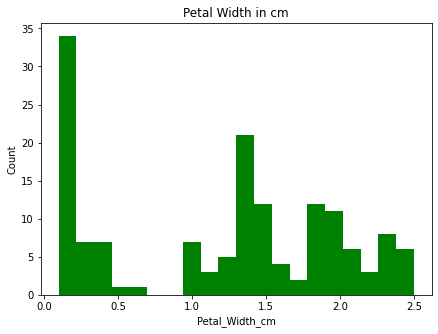

In [14]:
plt.figure(figsize = (7, 5)) 
x = ir.PetalWidthCm 
  
plt.hist(x, bins = 20, color = "green") 
plt.title("Petal Width in cm") 
plt.xlabel("Petal_Width_cm") 
plt.ylabel("Count") 
  
plt.show() 



   For both petal length and petal width there seems to be a group of data points that have smaller values than the others.

#Box plot for Iris dataset

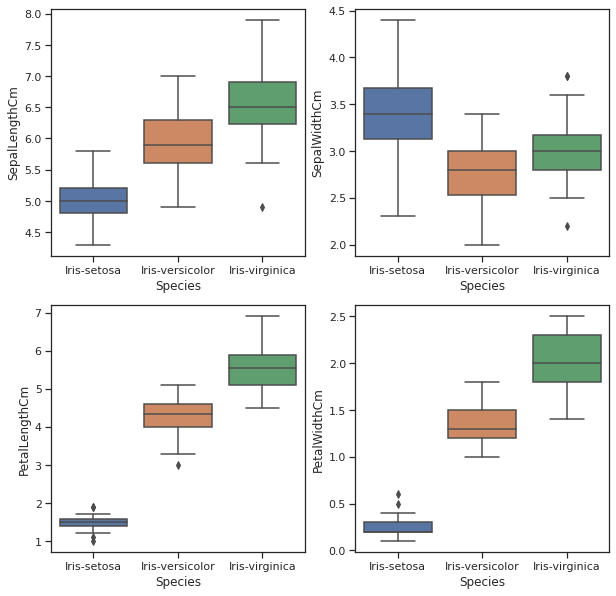

In [15]:
#Box plot to understand how the distribution varies by class of flower.
#The graph represented the shape of data distribution and their upper and lower quartiles.

sns.set(style="ticks") 
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='SepalLengthCm',data=ir)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='SepalWidthCm',data=ir)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='PetalLengthCm',data=ir)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='PetalWidthCm',data=ir)
plt.show()


   Setosa has its petal mesurements smaller and less spread out than other species.There are notable 9 outliers.Working on identifying them.



#outlier detection by IQR method:
By using Inter Quartile Range(IQR), we detect outliers. IQR tells us the variation in the data set.Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR treated as outliers.

#outliers for setosa

In [16]:
ir.loc[ir["Species"] == "Iris-setosa"] 
#print(ir.loc[data["Species"] == "Iris-setosa"])
sliced_data_setosa=ir[0:50] 
specific_data=sliced_data_setosa[["PetalLengthCm","PetalWidthCm","SepalLengthCm" , "SepalWidthCm", "Species"]] 

print("possible petallength outliers for setosa")
sample_setosa_petallength = sliced_data_setosa[["PetalLengthCm"]]
quartiles_setosa_petallength = np.percentile(sample_setosa_petallength, [5, 50, 95])
max_setosa_petallength = np.percentile(sample_setosa_petallength, 95)
min_setosa_petallength = np.percentile(sample_setosa_petallength, 5)
print("petallength max value for setosa:",max_setosa_petallength)
print("petallength min value for setosa:",min_setosa_petallength)
df_max_setosa_petallength = specific_data[specific_data.PetalLengthCm > max_setosa_petallength]
df_min_setosa_petallength = specific_data[specific_data.PetalLengthCm < min_setosa_petallength]
print(df_max_setosa_petallength)
print(df_min_setosa_petallength)

print("possible petalwidth outliers for setosa")
sample_setosa_petalwidth = sliced_data_setosa[["PetalWidthCm"]]
quartiles_setosa_petalwidth = np.percentile(sample_setosa_petalwidth, [5, 50, 95])
max_setosa_petalwidth = np.percentile(sample_setosa_petalwidth, 95)
min_setosa_petalwidth = np.percentile(sample_setosa_petalwidth, 5)
df_max_setosa_petalwidth = specific_data[specific_data.PetalWidthCm > max_setosa_petalwidth]
df_min_setosa_petalwidth = specific_data[specific_data.PetalWidthCm < min_setosa_petalwidth]
print("petalwidth max value for setosa:",max_setosa_petalwidth)
print("petalwidth min value for setosa:",min_setosa_petalwidth)
print(df_max_setosa_petalwidth)
print(df_min_setosa_petalwidth)

possible petallength outliers for setosa
petallength max value for setosa: 1.7
petallength min value for setosa: 1.2
    PetalLengthCm  PetalWidthCm  SepalLengthCm  SepalWidthCm      Species
24            1.9           0.2            4.8           3.4  Iris-setosa
44            1.9           0.4            5.1           3.8  Iris-setosa
    PetalLengthCm  PetalWidthCm  SepalLengthCm  SepalWidthCm      Species
13            1.1           0.1            4.3           3.0  Iris-setosa
22            1.0           0.2            4.6           3.6  Iris-setosa
possible petalwidth outliers for setosa
petalwidth max value for setosa: 0.4
petalwidth min value for setosa: 0.1
    PetalLengthCm  PetalWidthCm  SepalLengthCm  SepalWidthCm      Species
23            1.7           0.5            5.1           3.3  Iris-setosa
43            1.6           0.6            5.0           3.5  Iris-setosa
Empty DataFrame
Columns: [PetalLengthCm, PetalWidthCm, SepalLengthCm, SepalWidthCm, Species]
Index: []


#outliers for versicolor

In [17]:
ir.loc[ir["Species"] == "Iris-versicolor"] 
#print(ir.loc[data["Species"] == "Iris-versicolor"])
sliced_data_versicolor=ir[50:100] 
specific_data_versicolor=sliced_data_versicolor[["PetalLengthCm","PetalWidthCm","SepalLengthCm" , "SepalWidthCm", "Species"]] 

print("possible petallength outliers for versicolor")
sample_versicolor_petallength = sliced_data_versicolor[["PetalLengthCm"]]
quartiles_versicolor_petallength = np.percentile(sample_versicolor_petallength, [5, 50, 95])
max_versicolor_petallength = np.percentile(sample_versicolor_petallength, 95)
min_versicolor_petallength = np.percentile(sample_versicolor_petallength, 5)
print("petallength max value for versicolor:",max_versicolor_petallength)
print("petallength min value for versicolor:",min_versicolor_petallength)
df_max_versicolor_petallength = specific_data_versicolor[specific_data_versicolor.PetalLengthCm > max_versicolor_petallength]
df_min_versicolor_petallength = specific_data_versicolor[specific_data_versicolor.PetalLengthCm < min_versicolor_petallength]
print(df_max_versicolor_petallength)
print(df_min_versicolor_petallength)

possible petallength outliers for versicolor
petallength max value for versicolor: 4.9
petallength min value for versicolor: 3.3899999999999997
    PetalLengthCm  PetalWidthCm  SepalLengthCm  SepalWidthCm          Species
77            5.0           1.7            6.7           3.0  Iris-versicolor
83            5.1           1.6            6.0           2.7  Iris-versicolor
    PetalLengthCm  PetalWidthCm  SepalLengthCm  SepalWidthCm          Species
57            3.3           1.0            4.9           2.4  Iris-versicolor
93            3.3           1.0            5.0           2.3  Iris-versicolor
98            3.0           1.1            5.1           2.5  Iris-versicolor


#outliers for virginica

In [18]:
ir.loc[ir["Species"] == "Iris-virginica"] 
#print(ir.loc[data["Species"] == "Iris-virginica"])
sliced_data_virginica=ir[100:150] 
specific_data_virginica=sliced_data_virginica[["PetalLengthCm","PetalWidthCm","SepalLengthCm" , "SepalWidthCm", "Species"]] 

print("possible sepallength outliers for virginica")
sample_virginica_sepallength = sliced_data_virginica[["SepalLengthCm"]]
quartiles_virginica_sepallength = np.percentile(sample_virginica_sepallength, [5, 50, 95])
max_virginica_sepallength = np.percentile(sample_virginica_sepallength, 95)
min_virginica_sepallength = np.percentile(sample_virginica_sepallength, 5)
print("sepallength max value for virginica:",max_virginica_sepallength)
print("sepallength min value for virginica:",min_virginica_sepallength)
df_max_virginica_sepallength = specific_data_virginica[specific_data_virginica.SepalLengthCm > max_virginica_sepallength]
df_min_virginica_sepallength = specific_data_virginica[specific_data_virginica.SepalLengthCm < min_virginica_sepallength]
print(df_max_virginica_sepallength)
print(df_min_virginica_sepallength)

print("possible sepalwidth outliers for virginica")
sample_virginica_sepalwidth = sliced_data_virginica[["SepalWidthCm"]]
quartiles_virginica_sepalwidth = np.percentile(sample_virginica_sepalwidth, [5, 50, 95])
max_virginica_sepalwidth = np.percentile(sample_virginica_sepalwidth, 95)
min_virginica_sepalwidth = np.percentile(sample_virginica_sepalwidth, 5)
df_max_virginica_sepalwidth = specific_data_virginica[specific_data_virginica.SepalWidthCm > max_virginica_sepalwidth]
df_min_virginica_sepalwidth = specific_data_virginica[specific_data_virginica.SepalWidthCm < min_virginica_sepalwidth]
print("sepalwidth max value for virginica:",max_virginica_sepalwidth)
print("sepalwidth min value for virginica:",min_virginica_sepalwidth)
print(df_max_virginica_sepalwidth)
print(df_min_virginica_sepalwidth)

possible sepallength outliers for virginica
sepallength max value for virginica: 7.7
sepallength min value for virginica: 5.744999999999999
     PetalLengthCm  PetalWidthCm  SepalLengthCm  SepalWidthCm         Species
131            6.4           2.0            7.9           3.8  Iris-virginica
     PetalLengthCm  PetalWidthCm  SepalLengthCm  SepalWidthCm         Species
106            4.5           1.7            4.9           2.5  Iris-virginica
113            5.0           2.0            5.7           2.5  Iris-virginica
121            4.9           2.0            5.6           2.8  Iris-virginica
possible sepalwidth outliers for virginica
sepalwidth max value for virginica: 3.5099999999999993
sepalwidth min value for virginica: 2.5
     PetalLengthCm  PetalWidthCm  SepalLengthCm  SepalWidthCm         Species
109            6.1           2.5            7.2           3.6  Iris-virginica
117            6.7           2.2            7.7           3.8  Iris-virginica
131            6.4  

In [19]:
new_iris = ir.drop(ir.index[[13, 22, 23, 24,43,44,98,106,117,109,131]]) 
new_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
new_iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,139.000000,139.000000,139.000000,139.000000
mean,5.861871,3.030935,3.797842,1.210791
std,0.781711,0.422870,1.725616,0.754089
min,4.400000,2.000000,1.200000,0.100000
25%,5.200000,2.800000,1.550000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.700000,4.400000,6.900000,2.500000



13, 22, 23, 24,43,44,98,106,117,109,131 these are the outliers in the dataset.As you can see, the mean and standard deviation there is no different between the models. It is best to keep the points as there are no potential outliers.


#scatter plot for Iris dataset

Text(0.5, 1.0, 'fig 1- sepalwidth VS sepallength')

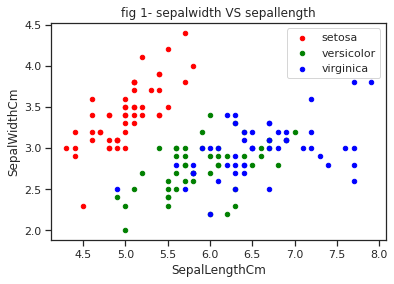

In [21]:
ax = ir[ir.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', color='red', label='setosa')
ir[ir.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', color='green', label='versicolor', ax=ax)
ir[ir.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', color='blue', label='virginica', ax=ax)
ax.set_title("fig 1- sepalwidth VS sepallength")

Text(0.5, 1.0, 'fig 2- petalwidth VS petallength')

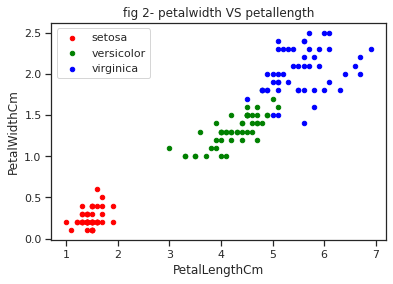

In [22]:
#scatter plot 
ax = ir[ir.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='red', label='setosa')
ir[ir.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='green', label='versicolor', ax=ax)
ir[ir.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='blue', label='virginica', ax=ax)
ax.set_title("fig 2- petalwidth VS petallength")

Text(0.5, 1.0, 'fig 3- sepallength VS petallength')

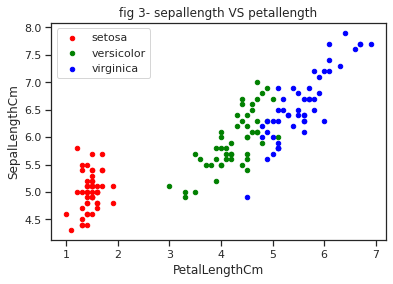

In [23]:
ax = ir[ir.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm', y='SepalLengthCm', color='red', label='setosa')
ir[ir.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='SepalLengthCm', color='green', label='versicolor', ax=ax)
ir[ir.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm', y='SepalLengthCm', color='blue', label='virginica', ax=ax)
ax.set_title("fig 3- sepallength VS petallength")

Text(0.5, 1.0, 'fig 4- sepalwidth VS petalwidth')

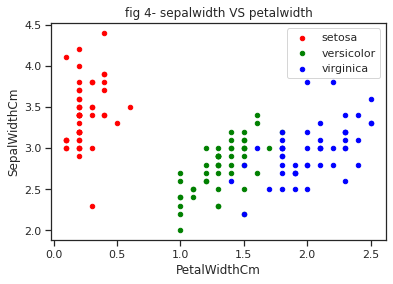

In [24]:
ax = ir[ir.Species=='Iris-setosa'].plot.scatter(x='PetalWidthCm', y='SepalWidthCm', color='red', label='setosa')
ir[ir.Species=='Iris-versicolor'].plot.scatter(x='PetalWidthCm', y='SepalWidthCm', color='green', label='versicolor', ax=ax)
ir[ir.Species=='Iris-virginica'].plot.scatter(x='PetalWidthCm', y='SepalWidthCm', color='blue', label='virginica', ax=ax)
ax.set_title("fig 4- sepalwidth VS petalwidth")

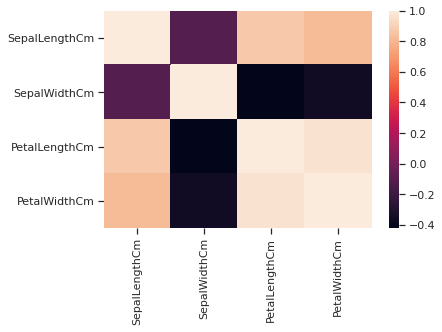

In [25]:
data = ir.copy()
corr = data.corr()
sns.heatmap(corr , xticklabels=corr.columns.values , yticklabels=corr.columns.values)
plt.show()

In [26]:
ir['PetalLengthCm'].corr(ir['PetalWidthCm'])

0.9627570970509663

In [27]:
ir['SepalLengthCm'].corr(ir['SepalWidthCm'])

-0.10936924995064937

In [28]:
ir['PetalLengthCm'].corr(ir['SepalLengthCm'])

0.8717541573048718

In [29]:
ir['PetalWidthCm'].corr(ir['SepalWidthCm'])

-0.35654408961380535



 By using sepal length VS sepal width and petallength VS petalwidth we can distinguish setosa flowers than that of Versicolor and Virginica. Separating versicolor and virginica is very much harder as they have considerable overlap.​Petal length vs. sepal length and petal width vs sepal width are not correlated when compared with Petal Width vs. Length which are highly correlated (positively).The  sepal length vs. Sepal width are also correlated(inversely).

